# Á∫øÊÄßÁ•ûÁªèÁΩëÁªú

## ‰∏Ä„ÄÅ Á∫øÊÄßÂõûÂΩí

1. Âü∫Êú¨ÂÖÉÁ¥†
- Á∫øÊÄßÊ®°ÂûãÔºöy‰∏∫ÂÖ≥‰∫éxËæìÂÖ•ÂêëÈáèÁöÑÂä†ÊùÉÁ∫øÊÄßÂíåÂæóÂà∞ÁöÑËæìÂá∫/‰∏•Ê†ºÊù•ËØ¥ÔºåÊòØËæìÂÖ•ÁâπÂæÅÁöÑ‰∏Ä‰∏™‰ªøÂ∞ÑÂèòÊç¢ÔºàaffinetransformationÔºâ„ÄÇ‰ªøÂ∞ÑÂèòÊç¢ÁöÑÁâπÁÇπÊòØÈÄöËøá
Âä†ÊùÉÂíåÂØπÁâπÂæÅËøõË°åÁ∫øÊÄßÂèòÊç¢ÔºàlineartransformationÔºâÔºåÂπ∂ÈÄöËøáÂÅèÁΩÆÈ°πÊù•ËøõË°åÂπ≥ÁßªÔºàtranslationÔºâ
- ÊçüÂ§±ÂáΩÊï∞ÔºöÂùáÊñπËØØÂ∑ÆÔºàMSEÔºâ‚Üí Ëß£ÊûêËß£Ê±ÇÊúÄ‰ºòÂèÇÊï∞ÔºõÂÖ∂‰Ωô‰∏Ä‰∫õÊçüÂ§±ÂáΩÊï∞Êó†Ê≥ïÂæóÂà∞Ëß£ÊûêËß£ ‚Üí Ê¢ØÂ∫¶‰∏ãÈôçÊ≥ïÔºõ
2. Áü¢ÈáèÂåñÂä†ÈÄü ÔºàÊääÊï∞ÊçÆÂèòÊàê‰∏Ä‰∏™Áü¢ÈáèËÄå‰∏çÊòØ‰∏Ä‰Ωç‰∏Ä‰ΩçÁöÑÂéªËÆ°ÁÆóÔºâ

In [56]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [57]:
class Timer:  # @save
    """ËÆ∞ÂΩïÂ§öÊ¨°ËøêË°åÊó∂Èó¥"""

    def __init__(self):
        self.times = []
        self.start()  #  Python ‰ºöËá™Âä®Â∏Æ‰Ω†ÊääÂú® __init__ ÈáåÈ¶ñÊ¨°ËµãÂÄºÁöÑÂèòÈáèÂΩìÊàêÂÆû‰æãÊàêÂëòÂèòÈáè

    def start(self):
        """ÂêØÂä®ËÆ°Êó∂Âô®"""
        self.tik = time.time()

    def stop(self):
        """ÂÅúÊ≠¢ËÆ°Êó∂Âô®Âπ∂Â∞ÜÊó∂Èó¥ËÆ∞ÂΩïÂú®ÂàóË°®‰∏≠"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """ËøîÂõûÂπ≥ÂùáÊó∂Èó¥"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """ËøîÂõûÊó∂Èó¥ÊÄªÂíå"""
        return sum(self.times)

    def cumsum(self):
        """ËøîÂõûÁ¥ØËÆ°Êó∂Èó¥"""
        return np.array(self.times).cumsum().tolist()

3. Ê≠£ÊÄÅÂàÜÂ∏É

In [58]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu) ** 2)

In [59]:
# ÂÜçÊ¨°‰ΩøÁî®numpyËøõË°åÂèØËßÜÂåñ
x = np.arange(
    -7, 7, 0.01
)  # ‰ªé -7 ÂºÄÂßãÔºåÂà∞ 7 ÁªìÊùüÔºà‰∏çÂåÖÊã¨ 7ÔºâÔºåÊ≠•Èïø‰∏∫ 0.01ÔºåÂæóÂà∞‰∏Ä‰∏™ÂåÖÂê´ÂæàÂ§öÊµÆÁÇπÊï∞ÁöÑÊï∞ÁªÑÔºå

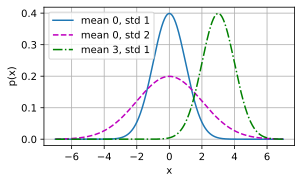

In [60]:
# ÂùáÂÄºÂíåÊ†áÂáÜÂ∑ÆÂØπ
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(# ‰ΩúÂõæÂáΩÊï∞
    x,# Ëá™ÂèòÈáè
    [normal(x, mu, sigma) for mu, sigma in params],# Âõ†ÂèòÈáè
    xlabel="x",
    ylabel="p(x)",
    figsize=(4.5, 2.5),  # ÂõæÂÉèÂ§ßÂ∞è
    legend=[f"mean {mu}, std {sigma}" for mu, sigma in params],# Âõæ‰æã
)

## ‰∫å„ÄÅ Á∫øÊÄßÂõûÂΩí‰ª£Á†Å
   

1. ÁîüÊàêÊï∞ÊçÆÈõÜ

In [61]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


In [62]:
def synthetic_data(w, b, num_examples): #@save
    """ÁîüÊàêy=Xw+b+Âô™Â£∞"""
    X = torch.normal(0, 1, (num_examples, len(w))) # ÁîüÊàê‰∏Ä‰∏™ÂΩ¢Áä∂‰∏∫ (num_examples, len(w)) ÁöÑÈöèÊú∫Áü©Èòµ ÊØè‰∏™ÂÖÉÁ¥†Êù•Ëá™ ùí©(0,1) ÁöÑÊ†áÂáÜÊ≠£ÊÄÅÂàÜÂ∏É
    y = torch.matmul(X, w) + b # Áü©Èòµ‰πòÊ≥ï
    y += torch.normal(0, 0.01, y.shape) # ÁîüÊàê‰∏é y ÂΩ¢Áä∂Áõ∏ÂêåÁöÑÈöèÊú∫Âô™Â£∞Âπ∂Âä†Âà∞ y ‰∏ä
    return X, y.reshape((-1, 1))


In [63]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [64]:
print('features:', features[0],'\nlabel:', labels[0])


features: tensor([ 0.2372, -0.5654]) 
label: tensor([6.6060])


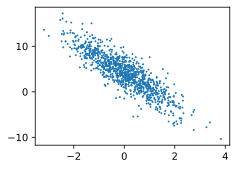

In [65]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)


2. ËØªÂèñÊï∞ÊçÆÈõÜ

In [66]:
def data_iter(batch_size, features, labels): #@save
    num_examples = len(features)
    indices = list(range(num_examples))
    # Ëøô‰∫õÊ†∑Êú¨ÊòØÈöèÊú∫ËØªÂèñÁöÑÔºåÊ≤°ÊúâÁâπÂÆöÁöÑÈ°∫Â∫è
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size): # Ê≠•Èïø‰∏∫ batch_size
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)]) # ËøôÈáåÂÜíÂè∑ÊòØpython‰∏≠listÁöÑÂàáÁâáÊìç‰Ωú
        yield features[batch_indices], labels[batch_indices] # ÈÄöËøáyieldÂÖ≥ÈîÆÂ≠óÂ∞ÜÂáΩÊï∞ÂèòÊàê‰∏Ä‰∏™ÁîüÊàêÂô®Ôºå‰∏ÄÊâπ‰∏ÄÊâπÂú∞ËøîÂõûÊï∞ÊçÆ

3. ÂàùÂßãÂåñÂèÇÊï∞

In [67]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True) # Âè™ÊúâÈúÄË¶ÅËá™Âä®‰ºòÂåñ„ÄÅÂèÇ‰∏éËÆ≠ÁªÉÁöÑÂèÇÊï∞ÊâçË¶ÅËÆæÁΩÆ requires_grad=True

4. ÂÆö‰πâÁ∫øÊÄßÊ®°ÂûãÔºàÂâçÈù¢ÁöÑy=Xw+b+Âô™Â£∞ÊòØ‰∫∫Â∑•ÈÄ†Êï∞ÊçÆÁî®ÁöÑÔºåÂú®ÁúüÂÆûÊÉÖÂÜµ‰∏ãÁõ¥Êé•Áî®ÁúüÊï∞ÊçÆÔºåËøôÈáåÊâçÂºÄÂßãÂª∫Ê®°Ê†πÊçÆfeatureÂíåwÂéªÈ¢ÑÊµãyÂæóÂà∞y_hatÔºâ

In [68]:
def linreg(X, w, b): #@save
    """Á∫øÊÄßÂõûÂΩíÊ®°Âûã"""
    return torch.matmul(X, w) + b # ËøôÈáåËøêÁî®‰∫ÜÂπøÊí≠Êú∫Âà∂Ôºåb‰ºöËá™Âä®Êâ©Â±ïÊàêÂíåXwÂêåÊ†∑ÁöÑÂΩ¢Áä∂ÔºàÂêëÈáèÔºâÂÜçÂÅöÂä†Ê≥ï

5. ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞ÔºàÂùáÊñπËØØÂ∑ÆÔºâ

In [69]:
def squared_loss(y_hat, y): #@save
    """ÂùáÊñπÊçüÂ§±"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

6. ÂÆö‰πâ‰ºòÂåñÁÆóÊ≥ïÔºàÊ¢ØÂ∫¶‰∏ãÈôçÔºâ

In [70]:
def sgd(params, lr, batch_size): #@save
    """Â∞èÊâπÈáèÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôç"""
    # lr: learning rate ÂÜ≥ÂÆö‰∫ÜÊØèÊ¨°Êõ¥Êñ∞ÁöÑÂπÖÂ∫¶
    # batch_size: ÊØè‰∏™Â∞èÊâπÈáèÂåÖÂê´ÁöÑÊ†∑Êú¨Êï∞
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # Âõ†‰∏∫Âú®ÂàùÂßãÂåñ w Âíå b Êó∂ËÆæÁΩÆ‰∫Ü requires_grad=TrueÔºåÊâÄ‰ª•Âú®ÂêéÁª≠ËÆ°ÁÆóÊçüÂ§±ÂáΩÊï∞Êó∂ÔºåPyTorch ‰ºöËá™Âä®ËøΩË∏™ÊâÄÊúâÊ∂âÂèä w Âíå b ÁöÑËøêÁÆóËøáÁ®ã
                                                  # ËøôÈáå‰πãÊâÄ‰ª•Ë¶ÅÈô§‰ª• batch_sizeÔºåÊòØÂõ†‰∏∫ loss ÁöÑËÆ°ÁÆóÊòØÂØπ‰∏Ä‰∏™Â∞èÊâπÈáèÊ†∑Êú¨ÁöÑÊçüÂ§±Ê±ÇÂíåÂæóÂà∞ÁöÑÔºåËÄåÊàë‰ª¨Â∏åÊúõÊõ¥Êñ∞ÁöÑÊ≠•‰ºê‰∏éÊ†∑Êú¨Êï∞Êó†ÂÖ≥
                                                  # ËøôÈáåÁöÑgradÊòØÊçüÂ§±ÂáΩÊï∞ÂØπparamÁöÑÂÅèÂØºÊï∞
            param.grad.zero_() # Ê¢ØÂ∫¶Ê∏ÖÈõ∂ÔºåÂê¶ÂàôÊ¢ØÂ∫¶‰ºöÁ¥ØÂä†


7. ËÆ≠ÁªÉÊ®°Âûã

In [71]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

In [72]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # XÂíåyÁöÑÂ∞èÊâπÈáèÊçüÂ§±
        # Âõ†‰∏∫lÂΩ¢Áä∂ÊòØ(batch_size,1)ÔºåËÄå‰∏çÊòØ‰∏Ä‰∏™Ê†áÈáè„ÄÇl‰∏≠ÁöÑÊâÄÊúâÂÖÉÁ¥†Ë¢´Âä†Âà∞‰∏ÄËµ∑ÔºåÂπ∂‰ª•Ê≠§ËÆ°ÁÆóÂÖ≥‰∫é[w,b]ÁöÑÊ¢ØÂ∫¶
        l.sum().backward() # ËøôÈáåÁî®backward()‰πãÂêéÂ∞±Áõ∏ÂΩì‰∫éËá™Âä®ËÆ°ÁÆó‰∫ÜlÂØπwÂíåbÁöÑÊ¢ØÂ∫¶ÔºåÂ≠òÂÇ®Âú®w.gradÂíåb.grad‰∏≠
        sgd([w, b], lr, batch_size) # ‰ΩøÁî®ÂèÇÊï∞ÁöÑÊ¢ØÂ∫¶Êõ¥Êñ∞ÂèÇÊï∞
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.032765
epoch 2, loss 0.000116
epoch 3, loss 0.000051


In [73]:
print(f'wÁöÑ‰º∞ËÆ°ËØØÂ∑Æ: {true_w - w.reshape(true_w.shape)}')
print(f'bÁöÑ‰º∞ËÆ°ËØØÂ∑Æ: {true_b - b}')

wÁöÑ‰º∞ËÆ°ËØØÂ∑Æ: tensor([-0.0003,  0.0007], grad_fn=<SubBackward0>)
bÁöÑ‰º∞ËÆ°ËØØÂ∑Æ: tensor([0.0007], grad_fn=<RsubBackward1>)


## ‰∏â„ÄÅ Á∫øÊÄßÂõûÂΩíÂ∞ÅË£Ö

In [74]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)


In [75]:
def load_array(data_arrays, batch_size, is_train=True): #@save
    """ÊûÑÈÄ†‰∏Ä‰∏™PyTorchÊï∞ÊçÆËø≠‰ª£Âô®"""
    # ÊääÂèñbatchÁöÑËøáÁ®ãÂ•Ω‰∫Ü
    # is_trainÂèÇÊï∞ÊåáÊòéÂú®ÊØè‰∏Ä‰∏™epochÁªìÊùüÂêéÊòØÂê¶ÈúÄË¶ÅÊâì‰π±Êï∞ÊçÆ
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)


In [76]:
list(iter(data_iter))

[[tensor([[-1.4958,  1.4691],
          [-0.2573, -0.4814],
          [-0.6753,  2.1756],
          [-1.0683,  1.2498],
          [-0.8047, -1.5690],
          [ 1.2952, -0.7898],
          [ 1.6378, -1.8083],
          [ 0.9681, -0.7308],
          [-0.4624,  0.0915],
          [-1.8010,  0.0788]]),
  tensor([[-3.7855],
          [ 5.3273],
          [-4.5329],
          [-2.1744],
          [ 7.9329],
          [ 9.4925],
          [13.6208],
          [ 8.6242],
          [ 2.9533],
          [ 0.3429]])],
 [tensor([[-0.7244, -0.2136],
          [ 0.3116, -0.3155],
          [ 0.5573,  0.1313],
          [ 1.8985,  0.7614],
          [-0.6163, -2.6794],
          [-0.6862,  0.0285],
          [ 0.5542, -1.1201],
          [-1.0190,  1.0332],
          [-0.6234,  1.3868],
          [-0.8989, -0.7816]]),
  tensor([[ 3.4814],
          [ 5.8774],
          [ 4.8678],
          [ 5.4025],
          [12.0802],
          [ 2.7289],
          [ 9.1231],
          [-1.3469],
          [-1.7

In [77]:
next(iter(data_iter)) # ÈÄöËøáPythonÂÜÖÁΩÆÂáΩÊï∞iter()Âíånext()ÂèØ‰ª•‰∏çÊñ≠‰ªéËø≠‰ª£Âô®ÔºàDataLoaderÔºâdata_iter‰∏≠Ëé∑ÂèñÂ∞èÊâπÈáèÊ†∑Êú¨ Ê†áÂáÜÁî®Ê≥ï

[tensor([[ 1.4752, -1.4275],
         [ 1.8802, -1.3122],
         [ 0.7496,  0.7105],
         [-1.6759,  1.4954],
         [-0.3280, -0.8061],
         [-1.8010,  0.0788],
         [ 1.2447, -1.4702],
         [ 1.0212,  0.6745],
         [ 2.4365,  1.2870],
         [-0.2042,  0.6623]]),
 tensor([[12.0138],
         [12.4249],
         [ 3.2673],
         [-4.2509],
         [ 6.2697],
         [ 0.3429],
         [11.6947],
         [ 3.9503],
         [ 4.6971],
         [ 1.5388]])]

ÂÆö‰πâÊ®°Âûã

In [78]:
# nnÊòØÁ•ûÁªèÁΩëÁªúÁöÑÁº©ÂÜô
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))
# SequentialÊòØ‰∏Ä‰∏™Á±ªÔºåÂ∞ÜÂ§ö‰∏™Â±Ç‰∏≤ËÅîÂú®‰∏ÄËµ∑
# LinearÊòØ‰∏Ä‰∏™Á±ªÔºåË°®Á§∫ÂÖ®ËøûÊé•Â±ÇÔºå‰∏§‰∏™ÂèÇÊï∞Ë°®Á§∫ËæìÂÖ•ÂíåËæìÂá∫ÁöÑÁª¥Â∫¶

In [79]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
# net[0]Ë°®Á§∫ÂèñnetÁöÑÁ¨¨‰∏Ä‰∏™Â±ÇÔºåÂç≥‰∏äÈù¢ÁöÑLinearÂ±Ç

tensor([0.])

In [80]:
loss = nn.MSELoss() # Â∞ÅË£ÖÂ•ΩÁöÑÊçüÂ§±ÂáΩÊï∞

In [81]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
# optimÊòØtorch‰∏≠Â∞ÅË£ÖÂ•ΩÁöÑ‰ºòÂåñÁÆóÊ≥ïÊ®°Âùó
# net.parameters() ‰ºöËøîÂõûÊ®°Âûã net ‰∏≠ÊâÄÊúâÈúÄË¶Å‰ºòÂåñÁöÑÂèÇÊï∞ÔºàÂ¶ÇÊùÉÈáçÂíåÂÅèÁΩÆÔºâÔºåËøô‰∫õÂèÇÊï∞‰ºöË¢´‰ºòÂåñÂô®ÁÆ°ÁêÜÂíåÊõ¥Êñ∞

ËÆ≠ÁªÉ

In [82]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter: # data_iter ‰Ωú‰∏∫torchÁöÑDataLoaderÊØèÊ¨°Ëø≠‰ª£ËøîÂõûÁöÑÂ∞±ÊòØ (X, y) ÂÖÉÁªÑ
        l = loss(net(X) ,y)
        trainer.zero_grad() # ‰ºòÂåñÂô®Ê¢ØÂ∫¶Ê∏ÖÈõ∂
        l.backward() # Ëá™Âä®ËÆ°ÁÆóÊ¢ØÂ∫¶
        trainer.step() # Ê†πÊçÆÊ¢ØÂ∫¶Êõ¥Êñ∞ÂèÇÊï∞
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')


epoch 1, loss 0.000195
epoch 2, loss 0.000097
epoch 3, loss 0.000096


## Âõõ„ÄÅ SoftmaxÂõûÂΩí

1. ÂàÜÁ±ªÈóÆÈ¢òË°®Á§∫Ôºö
one-hot encodingÔºàÁã¨ÁÉ≠ÁºñÁ†ÅÔºâÔºöÁºñÁ†Å‰∏Ä‰∏™ÂêëÈáèÔºåÂêëÈáè‰∏≠Âè™Êúâ‰∏Ä‰∏™ÂÖÉÁ¥†‰∏∫1ÔºåÂÖ∂‰ΩôÂÖÉÁ¥†‰∏∫0ÔºåË°®Á§∫‰∏Ä‰∏™Á±ªÂà´

2. ÁΩëÁªúÊû∂ÊûÑ

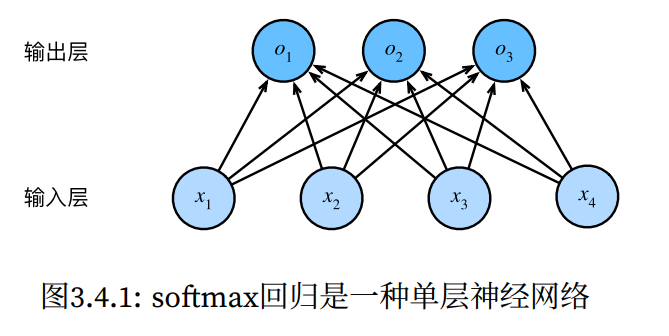

o = Wx + b  ËøôÈáå‰∏∫‰ªÄ‰πàË¶ÅÊúâ3‰∏™ËæìÂá∫??
‚ÜíËøôÈáåÊòØÈíàÂØπone-hot encodingÁöÑÔºåÊúâ3‰∏™ËæìÂá∫ÔºåÊØè‰∏™ËæìÂá∫ÂØπÂ∫î‰∏Ä‰∏™Á±ªÂà´ÔºåËæìÂá∫ÂêëÈáèoÁöÑÊØè‰∏™ÂÖÉÁ¥†ÂØπÂ∫î‰∏Ä‰∏™Á±ªÂà´ÁöÑÂæóÂàÜÔºåÂêéÈù¢ÈÄöËøásoftmaxÂèØ‰ª•ÊääËøô‰∏™ÂæóÂàÜÂèòÊàêÂ±û‰∫éËøô‰∏™Á±ªÂà´ÁöÑÊ¶ÇÁéá

3. softmaxÔºö ÂÖ∂ÂÆûËøòÊòØÂú®‰ªøÂ∞ÑÂèòÊç¢ÔºàÁ∫øÊÄßÂèòÊç¢+Âπ≥ÁßªÔºâÁöÑÂü∫Á°Ä‰∏äÂä†‰∫Ü‰∏Ä‰∏™softmaxÂáΩÊï∞ÔºåsoftmaxÂáΩÊï∞ÂèØ‰ª•ÊääÂæóÂàÜÂèòÊàêÊ¶ÇÁéáÔºå‰∏îÊ¶ÇÁéá‰πãÂíå‰∏∫1

4. ÊçüÂ§±ÂáΩÊï∞Ôºö‰∫§ÂèâÁÜµÂáΩÊï∞ÔºüÔºâ

## ‰∫î„ÄÅ ÂõæÂÉèÂàÜÁ±ªÊï∞ÊçÆÈõÜ

1. ËØªÂèñÊï∞ÊçÆÈõÜ

In [83]:
%matplotlib inline  
# Jupyter Notebook ÁöÑÈ≠îÊ≥ïÂëΩ‰ª§ÔºåÁî®‰∫éËÆæÁΩÆ Matplotlib ÁªòÂõæÊó∂Â∞ÜÂõæÂÉèÁõ¥Êé•ÂµåÂÖ•Âú®‰ª£Á†ÅÂçïÂÖÉ‰∏ãÊñπÔºåËÄå‰∏çÊòØÂºπÂá∫ÂçïÁã¨ÁöÑÁ™óÂè£
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display() # Áî®‰∫éËÆæÁΩÆ Jupyter Notebook ‰∏≠ Matplotlib ÁªòÂõæÁöÑÊòæÁ§∫Ê†ºÂºè‰∏∫ SVG

In [84]:
# ÈÄöËøáToTensorÂÆû‰æãÂ∞ÜÂõæÂÉèÊï∞ÊçÆ‰ªéPILÁ±ªÂûãÂèòÊç¢Êàê32‰ΩçÊµÆÁÇπÊï∞Ê†ºÂºèÔºå
# Âπ∂Èô§‰ª•255‰ΩøÂæóÊâÄÊúâÂÉèÁ¥†ÁöÑÊï∞ÂÄºÂùáÂú®0ÔΩû1‰πãÈó¥
trans = transforms.ToTensor() # ÊääÂõæÂÉèÊï∞ÊçÆ‰ªéPILÁ±ªÂûãÂèòÊç¢ÊàêÊØè‰∏Ä‰Ωç‰∏∫32‰ΩçÊµÆÁÇπÊï∞Ê†ºÂºèÁöÑÂº†ÈáèÔºåÂπ∂Èô§‰ª•255‰ΩøÂæóÊâÄÊúâÂÉèÁ¥†ÁöÑÊï∞ÂÄºÂùáÂú®0ÔΩû1‰πãÈó¥
mnist_train = torchvision.datasets.FashionMNIST(
    root="../C2data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../C2data", train=False, transform=trans, download=True)


In [85]:
x, y = mnist_train[0]

print(type(y))      # <class 'int'>  Êàñ <class 'torch.Tensor'> ÂèñÂÜ≥‰∫é torchvision ÁâàÊú¨
print(y)  

<class 'int'>
9


In [86]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [87]:
mnist_train[0][0].shape # (1, 28, 28) 1Ë°®Á§∫ÈÄöÈÅìÊï∞ÔºåÁÅ∞Â∫¶ÂõæÂÉèÂè™Êúâ‰∏Ä‰∏™ÈÄöÈÅìÔºåÂΩ©Ëâ≤ÂõæÂÉèÊúâ3‰∏™ÈÄöÈÅìÔºåÂàÜÂà´ÂØπÂ∫îRGB‰∏âÁßçÈ¢úËâ≤
# 28*28Ë°®Á§∫ÂõæÂÉèÁöÑÂàÜËæ®Áéá(ÁÆÄÂçïÁêÜËß£Â∞±ÊòØÈ´òÂ∫¶ÂíåÂÆΩÂ∫¶)
# ËøôÈáåmnist_train[0]Ë°®Á§∫ÂèñËÆ≠ÁªÉÈõÜÁöÑÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨Ôºåmnist_train[0][0]Ë°®Á§∫ÂèñËøô‰∏™Ê†∑Êú¨ÁöÑÂõæÂÉèÊï∞ÊçÆÔºåmnist_train[0][1]Ë°®Á§∫ÂèñËøô‰∏™Ê†∑Êú¨ÁöÑÊ†áÁ≠æ
# ‰πüÂ∞±ÊòØËØ¥mnist_train[0]Ë°®Á§∫ÂèñËÆ≠ÁªÉÈõÜÁöÑÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨ÊòØ‰∏Ä‰∏™ÂÖÉÁªÑ

torch.Size([1, 28, 28])

In [88]:
def get_fashion_mnist_labels(labels): #@save
    """ËøîÂõûFashion-MNISTÊï∞ÊçÆÈõÜÁöÑÊñáÊú¨Ê†áÁ≠æ"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
# Âª∫Á´ãone-hot encodingÁöÑÊ†áÁ≠æ 
# ÈóÆÈ¢òÊòØËøôÈáå‰º†ËøõÊù•ÁöÑlabelsÂ∞±ÊòØ‰∏Ä‰∏™intÁöÑlistÔºåÊØè‰∏Ä‰∏™int‰ª£Ë°®‰∏Ä‰∏™Á±ªÂà´Ôºå0-9ÂàÜÂà´ÂØπÂ∫î‰∏äÈù¢ÁöÑ10‰∏™Á±ªÂà´ÔºåÈÇ£‰∏çÂ∞±‰∏çÊòØone-hot encoding‰∫ÜÂêóÔºü


In [89]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): #@save
    """ÁªòÂà∂ÂõæÂÉèÂàóË°®"""
    # figÊòØÂÖ®Âõæ axesÊòØÂ≠êÂõæ Áõ∏ÂΩì‰∫éfigÈáåÈù¢Êúânum_rowsË°ånum_colsÂàóÁöÑÂ≠êÂõæaxes
    figsize = (num_cols * scale, num_rows * scale) # ÊâÄ‰ª•ËøôÈáåÁöÑscaleÊòØÊØè‰∏™Â≠êÂõæÁöÑÂ§ßÂ∞èÔºå1.5ÊåáÁöÑÊòØËã±ÂØ∏
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)): # ËøôÈáåÁöÑzipÊòØpythonÂÜÖÁΩÆÂáΩÊï∞ÔºåÂèØ‰ª•Êää‰∏§‰∏™listÊâìÂåÖÊàê‰∏Ä‰∏™listÔºåÈáåÈù¢ÁöÑÊØè‰∏™ÂÖÉÁ¥†ÊòØ‰∏Ä‰∏™tuple
        if torch.is_tensor(img):
            # ÂõæÁâáÂº†Èáè
            ax.imshow(img.numpy())
        else:
            # PILÂõæÁâá
            ax.imshow(img)
        ax.get_xaxis().set_visible(False) # ‰∏çÊòæÁ§∫ÂùêÊ†áËΩ¥
        ax.get_yaxis().set_visible(False) 
        if titles:
            ax.set_title(titles[i]) # ËÆæÁΩÆÂ≠êÂõæÊ†áÈ¢ò
    return axes


array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

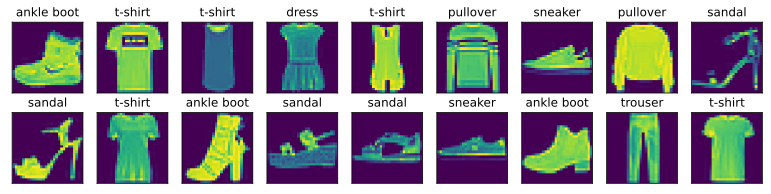

In [90]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y)) # ÊâÄ‰ª•ËøôÈáåyÂ≠òÁöÑÂÆûÈôÖÊòØÊï∞Â≠óÊ†áÁ≠æÔºåËÄå‰∏çÊòØone-hot encoding

ÂâçÈù¢Âè™ÊòØÂ±ïÁ§∫‰∫Ü‰∏Ä‰∏ã‰∏ãËΩΩ‰∏ãÊù•ÁöÑÊï∞ÊçÆÈõÜÔºåÂú®ÁúüÊ≠£ËÆ≠ÁªÉÁöÑÊó∂ÂÄôËøòÊòØ‰ΩøÁî®ÂÜÖÁΩÆÁöÑËø≠‰ª£Âô® DataaLoaderÔºåËøô‰∏™Ëø≠‰ª£Âô®‰ºöÂ∏ÆÊàë‰ª¨Ëá™Âä®Êâì‰π±Êï∞ÊçÆÔºåÂπ∂ÊØèÊ¨°ËøîÂõû‰∏Ä‰∏™batchÁöÑÊï∞ÊçÆ

In [91]:
batch_size = 256
def get_dataloader_workers(): #@save
    """‰ΩøÁî®4‰∏™ËøõÁ®ãÊù•ËØªÂèñÊï∞ÊçÆ"""
    return 4
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
    num_workers=get_dataloader_workers())

In [93]:
timer = d2l.Timer()
for X, y in train_iter:
    continue # Áõ∏ÂΩì‰∫éÂú®ÈÅçÂéÜËø≠‰ª£Âô®
f'{timer.stop():.2f} sec'


'5.75 sec'

## ÂÖ≠„ÄÅ SoftmaxÂõûÂΩíÁöÑ‰ªéÈõ∂ÂºÄÂßãÂÆûÁé∞

1. Â∑ÆÂà´ÔºöoutputÂèòÊàêÂêëÈáè‰∏îÁªèËøásoftmaxÊ†áÂáÜÂåñÔºõÊçüÂ§±ÂáΩÊï∞ÂèòÊàê‰∫§ÂèâÁÜµÊçüÂ§±ÂáΩÊï∞ÔºõÊçüÂ§±ÂáΩÊï∞ÁöÑËæìÂÖ•ÂèòÊàêone-hot encodingÁöÑÊ†áÁ≠æ

2. trickÔºöÂÆö‰πâÊ®°ÂûãÁ≤æÂ∫¶

In [ ]:
def accuracy(y_hat, y): #@save
    """ËÆ°ÁÆóÈ¢ÑÊµãÊ≠£Á°ÆÁöÑÊï∞Èáè"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # axis=1Ë°®Á§∫ÊåâË°åÂèñÊúÄÂ§ßÂÄºÔºåËøîÂõûÁöÑÊòØÊØè‰∏ÄË°åÁöÑÊúÄÂ§ßÂÄºÁöÑÁ¥¢ÂºïÔºå‰πüÂ∞±ÊòØÈ¢ÑÊµãÁöÑÁ±ªÂà´
    cmp = y_hat.type(y.dtype) == y 
    return float(cmp.type(y.dtype).sum())

In [3]:
class Accumulator: #@save
    """Âú®n‰∏™ÂèòÈáè‰∏äÁ¥ØÂä†"""
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)] # ËøôÈáåzipÂáΩÊï∞‰ºöËøîÂõû‰∏Ä‰∏™listÔºåÈáåÈù¢ÁöÑÊØè‰∏™ÂÖÉÁ¥†ÊòØ‰∏Ä‰∏™tupleÔºåtupleÁöÑÁ¨¨‰∏Ä‰∏™ÂÖÉÁ¥†ÊòØself.dataÁöÑÂÖÉÁ¥†ÔºåÁ¨¨‰∫å‰∏™ÂÖÉÁ¥†ÊòØargsÁöÑÂÖÉÁ¥†Ôºõ‰πüÂ∞±ÊòØËØ¥zipÊää‰∏§‰∏™listÊâìÂåÖÊàê‰∏Ä‰∏™listÔºåÈáåÈù¢ÁöÑÊØè‰∏™ÂÖÉÁ¥†ÊòØ‰∏Ä‰∏™tupleÔºåtupleÁöÑÁ¨¨‰∏Ä‰∏™ÂÖÉÁ¥†ÊòØself.dataÁöÑÂÖÉÁ¥†ÔºåÁ¨¨‰∫å‰∏™ÂÖÉÁ¥†ÊòØargsÁöÑÂÖÉÁ¥†
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
def evaluate_accuracy(net, data_iter): #@save
    """ËÆ°ÁÆóÂú®ÊåáÂÆöÊï∞ÊçÆÈõÜ‰∏äÊ®°ÂûãÁöÑÁ≤æÂ∫¶"""
    if isinstance(net, torch.nn.Module): # Âà§Êñ≠ net ÊòØ‰∏çÊòØ‰∏Ä‰∏™ PyTorch Ê®°ÂûãÔºàtorch.nn.Module ÁöÑÂ≠êÁ±ªÔºâÔºåÂè™ÊúâËøôÁßçÁ±ªÂûãÁöÑÂØπË±°ÊâçÊúâ net.eval() Ëøô‰∏™ÊñπÊ≥ï
        net.eval() # Â∞ÜÊ®°ÂûãËÆæÁΩÆ‰∏∫ËØÑ‰º∞Ê®°ÂºèÔºåËøôÈáå‰∏çÂÜçËÆ≠ÁªÉÔºå‰∏ç‰ºöÊîπÂä®Ê®°Âûã
    metric = Accumulator(2) # Ê≠£Á°ÆÈ¢ÑÊµãÊï∞„ÄÅÈ¢ÑÊµãÊÄªÊï∞
    with torch.no_grad(): # Ë°®Êòé‰∏ãÈù¢‰∏çÊòØÂú®ËÆ≠ÁªÉÔºåËÄåÊòØÁî®Â∑≤ÁªèËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÊ£ÄÊµãÔºåÊâÄ‰ª•‰∏çÁî®ËÆ°ÁÆóÊ¢ØÂ∫¶„ÄÇÂê¶Âàô‰ºöËá™Âä®ËÆ°ÁÆóÂç†Áî®Á©∫Èó¥‰πãÁ±ªÁöÑ
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel()) # ÊØè‰∏Ä‰∏™batchÁöÑÈ¢ÑÊµãÊ≠£Á°ÆÁöÑÊï∞ÈáèÂíåÈ¢ÑÊµãÊÄªÊï∞ÈÉΩÁ¥ØÂä†Âà∞metric‰∏≠
    return metric[0] / metric[1] # ËøôÈáåÁöÑmetric[0]Ë°®Á§∫Ê≠£Á°ÆÈ¢ÑÊµãÊÄªÊï∞Ôºåmetric[1]Ë°®Á§∫È¢ÑÊµãÊÄªÊï∞

3. ÂÆûÁé∞

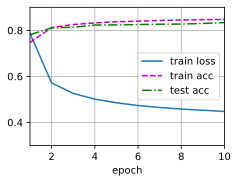

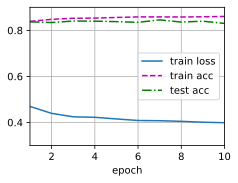

In [9]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256

# 1. Âä†ËΩΩÊï∞ÊçÆÈõÜ
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
X, y = next(iter(train_iter))

# 2. ÂÆö‰πâÊ®°Âûã
# PyTorch‰∏ç‰ºöÈöêÂºèÂú∞Ë∞ÉÊï¥ËæìÂÖ•ÁöÑÂΩ¢Áä∂„ÄÇÂõ†Ê≠§Ôºå
# Êàë‰ª¨Âú®Á∫øÊÄßÂ±ÇÂâçÂÆö‰πâ‰∫ÜÂ±ïÂπ≥Â±ÇÔºàflattenÔºâÔºåÊù•Ë∞ÉÊï¥ÁΩëÁªúËæìÂÖ•ÁöÑÂΩ¢Áä∂
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

# 3. ÂàùÂßãÂåñÊ®°ÂûãÂèÇÊï∞
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights) # ÂØπnet‰∏≠ÁöÑÊâÄÊúâÂèÇÊï∞ËøõË°åÂàùÂßãÂåñ

# 4. ÂÆö‰πâÊçüÂ§±ÂáΩÊï∞ ËøôÈáåËØ¥‰∫Ü‰∏äÊ∫¢Âíå‰∏ãÊ∫¢ÁöÑ‰∫ãÊÉÖÔºåÂÖ∑‰ΩìÁªÜËäÇËøòÊ≤°ÁêÜËß£
loss = nn.CrossEntropyLoss(reduction='none') # PyTorch Ëá™Â∏¶ÁöÑ‰∫§ÂèâÁÜµÊçüÂ§±ÂáΩÊï∞
# reduction='none' Ë°®Á§∫‰∏çÂØπ batch ÂÜÖÁöÑÊ†∑Êú¨ÊçüÂ§±ÂÅöÂπ≥ÂùáÊàñÊ±ÇÂíåÔºåËÄåÊòØÈÄêÊ†∑Êú¨ËøîÂõûÂéüÂßãÊçüÂ§±‚Äî‚ÄîÂæóÂà∞‰∏Ä‰∏™ÂΩ¢Áä∂‰∏∫ [batch_size] ÁöÑÂº†Èáè

# 5. ÂÆö‰πâ‰ºòÂåñÂô®
trainer1 = torch.optim.SGD(net.parameters(), lr=0.1)
trainer2 = torch.optim.Adam(net.parameters(), lr=0.01)

# 6. ËÆ≠ÁªÉÊ®°Âûã
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer1)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer2)
# ËøôÈáåd2lÂ∏ÆÂøôÂ∞ÅË£ÖÂ•Ω‰∫ÜÔºåÂÆûÈôÖÁöÑËøáÁ®ãÂú®ÊØè‰∏Ä‰∏™epoch‰∏≠ËÆ≠ÁªÉÔºàÂÆö‰πâ‰ºòÂåñ„ÄÅÊçüÂ§±Ôºâ‚ÜíÊ£ÄÊµãÔºàlossÔºåaccuÔºâ‚ÜíÁªòÂõæ